# **Space X Falcon 9 Landing Prediction**

## **Machine Learning Prediction**

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. Here we will create a machine learning pipeline to predict if the first stage will land or not

###Importing libraries

In [93]:
# all of the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import pickle
from sklearn.metrics import RocCurveDisplay

###Load DaraFrame

In [37]:
!git clone https://github.com/marjananooshiravan/IBM.SpaceX.Project.git

fatal: destination path 'IBM.SpaceX.Project' already exists and is not an empty directory.


In [38]:
url = "https://github.com/marjananooshiravan/IBM.SpaceX.Project/raw/main/dataset_falcon9.csv"
df = pd.read_csv(url)
df.head()



,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

### Taking a Look at our Data

###class pie chart for distribution
class determinds whether the lunch has been successful or not its already not empty and  binery coded

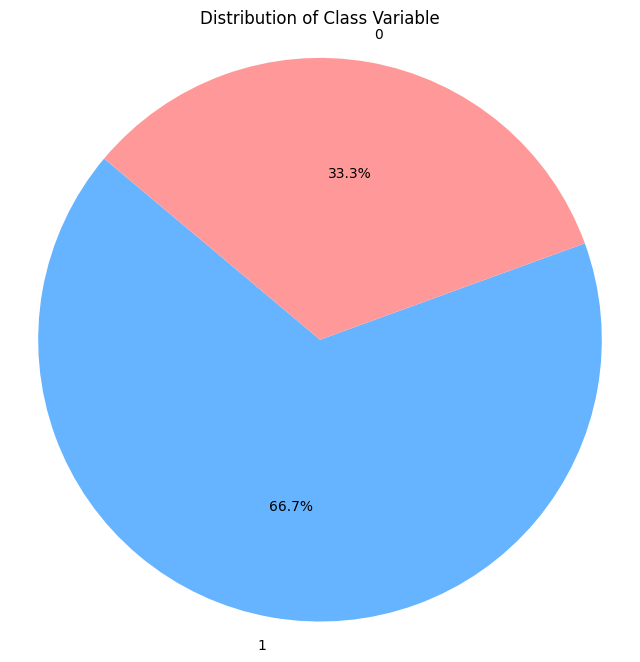

In [40]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Class Variable')
plt.axis('equal')
plt.show()

In [41]:
df['BoosterVersion'].value_counts()

,count
BoosterVersion,
Falcon 9,90


In [42]:
df['Orbit'].value_counts()

,count
Orbit,
GTO,27
ISS,21
VLEO,14
PO,9
LEO,7
SSO,5
MEO,3
ES-L1,1
HEO,1


<Axes: xlabel='Orbit'>

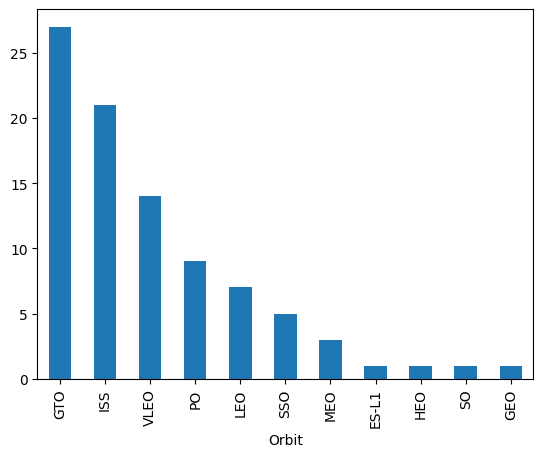

In [43]:
df['Orbit'].value_counts().plot(kind='bar')

In [44]:
df['LaunchSite'].value_counts()

,count
LaunchSite,
CCAFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


In [45]:
df['Outcome'].value_counts()

,count
Outcome,
True ASDS,41
None None,19
True RTLS,14
False ASDS,6
True Ocean,5
False Ocean,2
None ASDS,2
False RTLS,1


In [46]:
df['LandingPad'].value_counts()

,count
LandingPad,
5e9e3032383ecb6bb234e7ca,35
5e9e3032383ecb267a34e7c7,13
5e9e3033383ecbb9e534e7cc,12
5e9e3032383ecb761634e7cb,2
5e9e3032383ecb554034e7c9,2


###Cleaning the Data

In [47]:
df['LandingPad'] = df['LandingPad'].replace(np.nan,'nan' )

In [48]:
df=df.drop(columns=['FlightNumber','BoosterVersion','Serial','Longitude','Latitude','Date'])

In [49]:
df

,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Class
0,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,nan,1.0,0,0
1,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,nan,1.0,0,0
2,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,nan,1.0,0,0
3,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,nan,1.0,0,0
4,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,nan,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,1
86,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,1
87,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,1
88,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PayloadMass  90 non-null     float64
 1   Orbit        90 non-null     object 
 2   LaunchSite   90 non-null     object 
 3   Outcome      90 non-null     object 
 4   Flights      90 non-null     int64  
 5   GridFins     90 non-null     bool   
 6   Reused       90 non-null     bool   
 7   Legs         90 non-null     bool   
 8   LandingPad   90 non-null     object 
 9   Block        90 non-null     float64
 10  ReusedCount  90 non-null     int64  
 11  Class        90 non-null     int64  
dtypes: bool(3), float64(2), int64(3), object(4)
memory usage: 6.7+ KB


### Making the preprocessed dataframe

In [51]:
df_preprocessed = pd.get_dummies(columns=['Orbit','LaunchSite','Outcome','GridFins','Reused','Legs','LandingPad'],data=df,dtype=int)

In [52]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PayloadMass                          90 non-null     float64
 1   Flights                              90 non-null     int64  
 2   Block                                90 non-null     float64
 3   ReusedCount                          90 non-null     int64  
 4   Class                                90 non-null     int64  
 5   Orbit_ES-L1                          90 non-null     int64  
 6   Orbit_GEO                            90 non-null     int64  
 7   Orbit_GTO                            90 non-null     int64  
 8   Orbit_HEO                            90 non-null     int64  
 9   Orbit_ISS                            90 non-null     int64  
 10  Orbit_LEO                            90 non-null     int64  
 11  Orbit_MEO                         

In [53]:
df.to_csv('df_preprocessed.csv', index= False)

### Processing the Data

####Defining X ,Y

In [54]:
X = df_preprocessed.drop("Class", axis=1)
Y = df_preprocessed["Class"]

In [56]:
X

,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,...,Reused_False,Reused_True,Legs_False,Legs_True,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,LandingPad_nan
0,6104.959412,1,1.0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
1,525.000000,1,1.0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
2,677.000000,1,1.0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
3,500.000000,1,1.0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,3170.000000,1,1.0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,2,5.0,2,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
86,15400.000000,3,5.0,2,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
87,15400.000000,6,5.0,5,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
88,15400.000000,3,5.0,2,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


## Standardize Features

In [57]:
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(X)
x_scaled

array([[-1.94814463e-16, -6.53912840e-01, -1.57589457e+00, ...,
        -1.50755672e-01, -3.92232270e-01,  1.56892908e+00],
       [-1.19523159e+00, -6.53912840e-01, -1.57589457e+00, ...,
        -1.50755672e-01, -3.92232270e-01,  1.56892908e+00],
       [-1.16267307e+00, -6.53912840e-01, -1.57589457e+00, ...,
        -1.50755672e-01, -3.92232270e-01,  1.56892908e+00],
       ...,
       [ 1.99100483e+00,  3.49060516e+00,  9.45536744e-01, ...,
        -1.50755672e-01, -3.92232270e-01, -6.37377439e-01],
       [ 1.99100483e+00,  1.00389436e+00,  9.45536744e-01, ...,
        -1.50755672e-01,  2.54950976e+00, -6.37377439e-01],
       [-5.19213966e-01, -6.53912840e-01,  9.45536744e-01, ...,
        -1.50755672e-01, -3.92232270e-01, -6.37377439e-01]])

In [58]:
col=X.columns
X = pd.DataFrame(x_scaled, columns=col)
X

,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,...,Reused_False,Reused_True,Legs_False,Legs_True,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,LandingPad_nan
0,-1.948145e-16,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,-0.551677,3.443420,...,0.835532,-0.835532,1.933091,-1.933091,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232,1.568929
1,-1.195232e+00,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,-0.551677,3.443420,...,0.835532,-0.835532,1.933091,-1.933091,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232,1.568929
2,-1.162673e+00,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,1.812654,-0.290409,...,0.835532,-0.835532,1.933091,-1.933091,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232,1.568929
3,-1.200587e+00,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,-0.551677,-0.290409,...,0.835532,-0.835532,1.933091,-1.933091,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232,1.568929
4,-6.286706e-01,-0.653913,-1.575895,-0.973440,-0.106,-0.106,1.527525,-0.106,-0.551677,-0.290409,...,0.835532,-0.835532,1.933091,-1.933091,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232,1.568929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.991005e+00,0.174991,0.945537,0.202528,-0.106,-0.106,-0.654654,-0.106,-0.551677,-0.290409,...,-1.196843,1.196843,-0.517306,0.517306,-0.410891,-0.150756,1.253566,-0.150756,-0.392232,-0.637377
86,1.991005e+00,1.003894,0.945537,0.202528,-0.106,-0.106,-0.654654,-0.106,-0.551677,-0.290409,...,-1.196843,1.196843,-0.517306,0.517306,-0.410891,-0.150756,1.253566,-0.150756,-0.392232,-0.637377
87,1.991005e+00,3.490605,0.945537,1.966480,-0.106,-0.106,-0.654654,-0.106,-0.551677,-0.290409,...,-1.196843,1.196843,-0.517306,0.517306,-0.410891,-0.150756,1.253566,-0.150756,-0.392232,-0.637377
88,1.991005e+00,1.003894,0.945537,0.202528,-0.106,-0.106,-0.654654,-0.106,-0.551677,-0.290409,...,-1.196843,1.196843,-0.517306,0.517306,-0.410891,-0.150756,-0.797724,-0.150756,2.549510,-0.637377


## Train- Test Split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

## Logistic Regression

In [60]:
lr=LogisticRegression()
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
logreg_cv = GridSearchCV(lr, parameters,cv=4)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [71]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9375


Calculate the accuracy on the test data using the method score:


In [61]:
accu=[]
methods=[]
accu.append(logreg_cv.score(X_test,Y_test))
methods.append('logistic regression')
logreg_cv.score(X_test,Y_test)

0.9259259259259259

## Confusion Matrix:


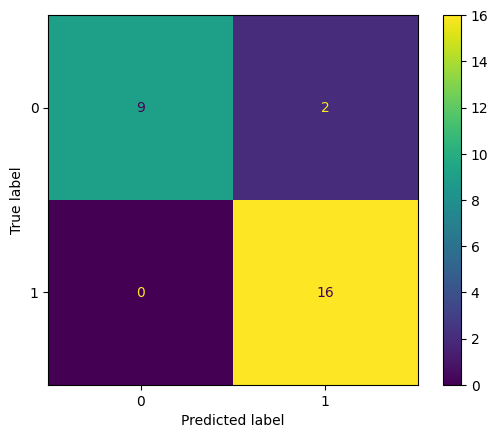

In [72]:
yhat = logreg_cv.predict(X_test)
ConfusionMatrixDisplay.from_estimator(logreg_cv, X_test, Y_test)

## Support Vector Machine

In [66]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': (0.5, 1, 1.5)}
svm = SVC()

In [67]:
svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (0.5, 1, 1.5),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [68]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.5, 'kernel': 'linear'}
accuracy : 0.9666666666666668


Calculate the accuracy on the test data using the method

In [69]:
accu.append(svm_cv.score(X_test,Y_test))
methods.append('support vector machine')
svm_cv.score(X_test,Y_test)

1.0

### Confusion Matrix

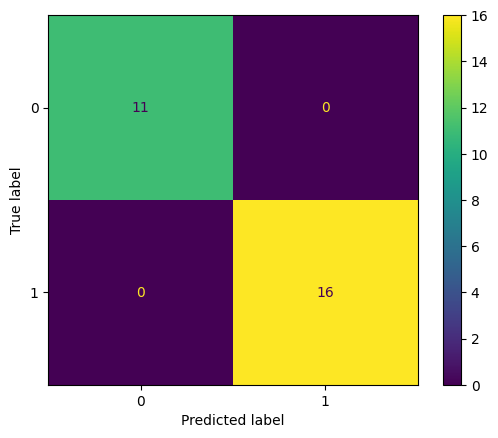

In [75]:
yhat = svm_cv.predict(X_test)
ConfusionMatrixDisplay.from_predictions(Y_test, yhat)

## Decision Trees

In [76]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [77]:
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [78]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.9547619047619047


Calculate the accuracy of tree_cv on the test data using the method

In [79]:
accu.append(tree_cv.score(X_test,Y_test))
methods.append('decision tree classifier')
tree_cv.score(X_test,Y_test)

0.8518518518518519

### Confusion Matrix

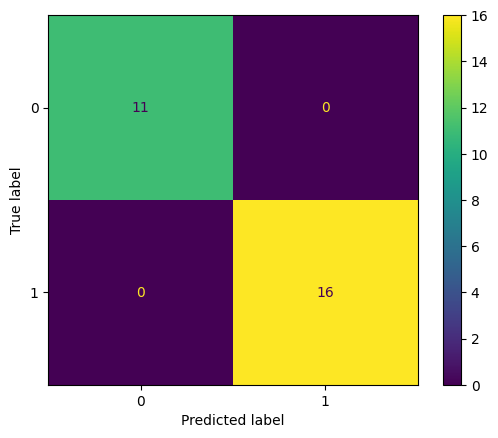

In [81]:
yhat = svm_cv.predict(X_test)
ConfusionMatrixDisplay.from_predictions(Y_test,yhat)

## K Nearest Neighbors

In [82]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [83]:
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [84]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}
accuracy : 0.9238095238095239


Calculate the accuracy of knn_cv on the test data

In [85]:
accu.append(knn_cv.score(X_test,Y_test))
methods.append('k nearest neighbors')
knn_cv.score(X_test,Y_test)

0.8518518518518519

### Confusion Matrix

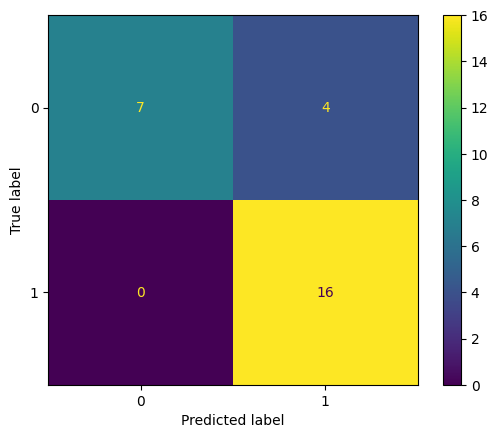

In [86]:
yhat = knn_cv.predict(X_test)
ConfusionMatrixDisplay.from_predictions(Y_test,yhat)

# Find the method performs best:

In [87]:
print(methods)
print(accu)

['logistic regression', 'support vector machine', 'decision tree classifier', 'k nearest neighbors']
[0.9259259259259259, 1.0, 0.8518518518518519, 0.8518518518518519]


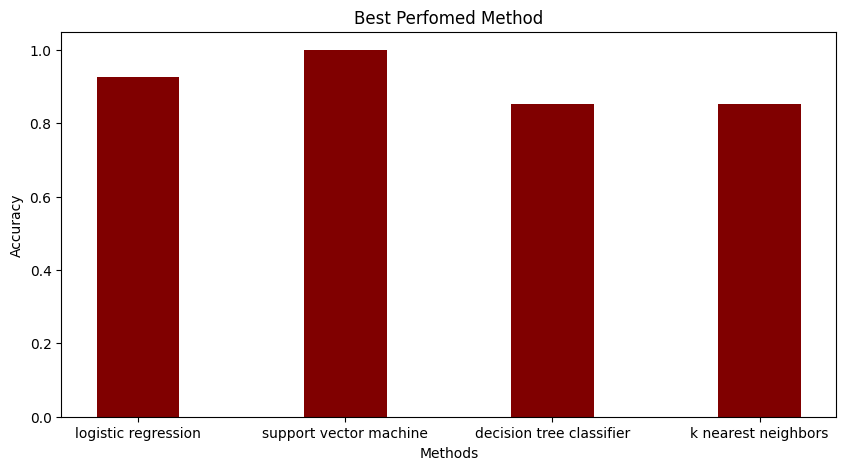

In [88]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(methods, accu, color ='maroon',
        width = 0.4)

plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()

### SAVE-LOAD the trained model using pickle


In [91]:
with open('model.pkl','wb') as f:
    pickle.dump(logreg_cv,f)

## ROC Curve

Text(0.5, 1.0, 'Area Under ROC')

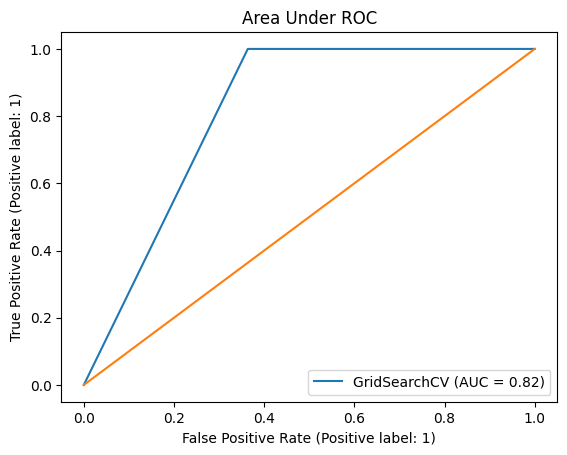

In [94]:
RocCurveDisplay.from_estimator(knn_cv,X_test,Y_test)
plt.plot([0,1],[0,1])
plt.title('Area Under ROC')

## Imbalance Data

<Axes: xlabel='Class', ylabel='count'>

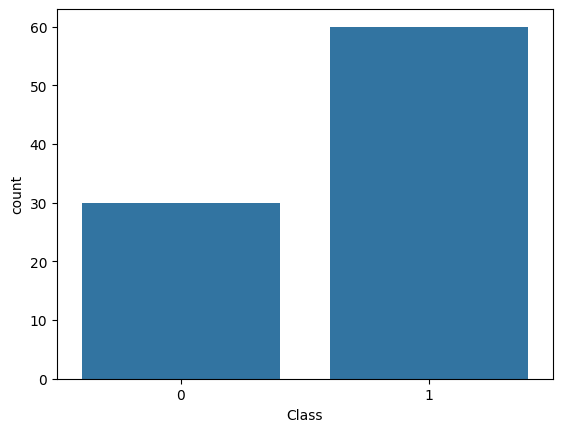

In [96]:
sns.countplot(x ='Class', data = df_preprocessed)